In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from utils import one_hot_label
from generate_data import generate_data, generate_grid_data

from modules import Linear, Sequential
from modules.activations import ReLU, Sigmoid, Softmax, Tanh
from losses import LossMSE, LossSoftmaxCrossEntropy
from optimizers import SGD

In [2]:
def plot_data(points, labels=0, minn=0, maxx=1, radius=1/np.sqrt(2*np.pi), center=np.array([0.5, 0.5])):
    circle = plt.Circle(center, radius, color='r', fill=False, linewidth=5)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.add_patch(circle)
    ax.scatter(points[:,0], points[:,1], c=labels)
    ax.set_xlim(minn, maxx)
    ax.set_ylim(minn, maxx)

In [24]:
def default_net_1(x_train, y_train, num_of_neurons=(2, 25, 25, 25, 2), lr=0.1, momentum_coef=0.0, num_of_epochs=100):
    model = Sequential(
        [
            Linear(num_of_neurons[0], num_of_neurons[1], activation=ReLU()),
            Linear(num_of_neurons[1], num_of_neurons[2], activation=Tanh()),
            Linear(num_of_neurons[2], num_of_neurons[3], activation=Tanh()),
            Linear(num_of_neurons[3], num_of_neurons[4])
        ]
    )
    # mse = LossMSE()
    ce = LossSoftmaxCrossEntropy()
    model.loss = ce
    sgd = SGD(lr, momentum_coef, weight_decay=0)

    # TODO verbose
    sgd.train(model, x_train, y_train, num_of_epochs)

    return model, ce.loss_logging


In [25]:
points, labels = generate_data(is_torch=True, num_of_points=1000)
print(type(points), " -- ", type(labels))
labels = one_hot_label(labels, val=0)  # convert labels to 1-hot encoding

model, loss1 = default_net_1(points, labels, num_of_epochs=5000)
print(loss1)

  1%|          | 58/5000 [00:00<00:08, 573.93it/s]

<class 'torch.FloatTensor'>  --  <class 'torch.FloatTensor'>
Name: 0 
Name: 0_ReLU 
Name: 1 
Name: 1_Tanh 
Name: 2 
Name: 2_Tanh 
Name: 3 


100%|██████████| 5000/5000 [00:07<00:00, 672.53it/s]


 0.6956
 0.6947
 0.6941
   ⋮   
 0.0219
 0.0219
 0.0219
[torch.FloatTensor of size 5000]



In [26]:
p = generate_grid_data(minn=0, maxx=1, num_of_points_per_dim=51, is_torch=True)
model.print_model()

Name: 0
Name: 0_ReLU
Name: 1
Name: 1_Tanh
Name: 2
Name: 2_Tanh
Name: 3


In [27]:
out1 = model.predict(p)
print(out1)


 0
 0
 0
⋮ 
 0
 0
 0
[torch.LongTensor of size 2601]



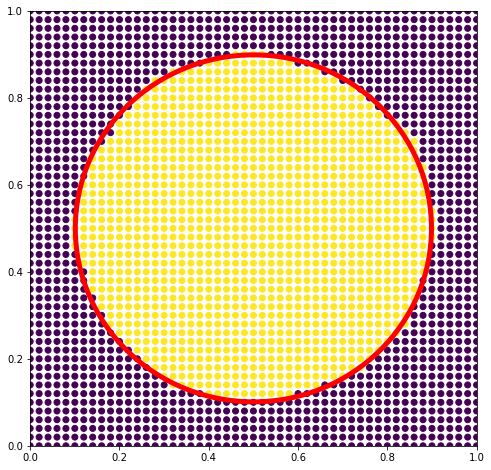

In [28]:
plot_data(p, out1)